# Supplier Shipping/ Purchasing Cost Example

Minimize the total cost of purchasing and shipping from multiple suppliers. This is very similar to a previous solver problem in this manual called Shipping Cost Reduction, except that there is a variation on the purchase price of the product. The product is being purchased and then shipped from multiple sources to multiple destinations. Shipping rates for each source/destination are different, as are purchase prices from each source. Each destination requires a different amount of product and the sources all have different amounts of product available. The objective is to minimize the total cost of purchasing and shipping. 		

**Problem:**  

Four factories within 1 company obtain the same raw material Product A from 4 different outside suppliers. Each of the 4 suppliers provides a different per unit purchase price for Product A. Per unit shipping costs also vary greatly between each of the 4 suppliers and each of the 4 factories. Each of the 4 factories requires a different amount of Product A and each of the 4 suppliers has a different amount of Product A available. The objective is to determine the optimal amounts of Product A to purchase and ship between each supplier and each factory in order to minimize total purchase and shipping cost.

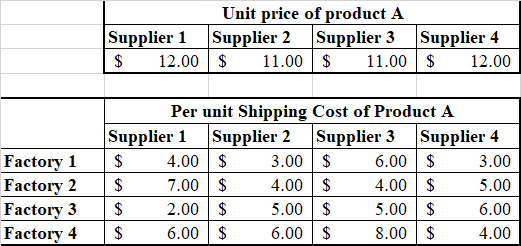

In [23]:
from pulp import *

#Create a problem
prob = LpProblem("Cost Minimization", LpMinimize)

#Create the variables:
F1S1=LpVariable("Units shipped to Factory 1 from Supplier 1",0,None,LpInteger)
F1S2=LpVariable("Units shipped to Factory 1 from Supplier 2",0,None,LpInteger)
F1S3=LpVariable("Units shipped to Factory 1 from Supplier 3",0,None,LpInteger)
F1S4=LpVariable("Units shipped to Factory 1 from Supplier 4",0,None,LpInteger)

F2S1=LpVariable("Units shipped to Factory 2 from Supplier 1",0,None,LpInteger)
F2S2=LpVariable("Units shipped to Factory 2 from Supplier 2",0,None,LpInteger)
F2S3=LpVariable("Units shipped to Factory 2 from Supplier 3",0,None,LpInteger)
F2S4=LpVariable("Units shipped to Factory 2 from Supplier 4",0,None,LpInteger)

F3S1=LpVariable("Units shipped to Factory 3 from Supplier 1",0,None,LpInteger)
F3S2=LpVariable("Units shipped to Factory 3 from Supplier 2",0,None,LpInteger)
F3S3=LpVariable("Units shipped to Factory 3 from Supplier 3",0,None,LpInteger)
F3S4=LpVariable("Units shipped to Factory 3 from Supplier 4",0,None,LpInteger)

F4S1=LpVariable("Units shipped to Factory 4 from Supplier 1",0,None,LpInteger)
F4S2=LpVariable("Units shipped to Factory 4 from Supplier 2",0,None,LpInteger)
F4S3=LpVariable("Units shipped to Factory 4 from Supplier 3",0,None,LpInteger)
F4S4=LpVariable("Units shipped to Factory 4 from Supplier 4",0,None,LpInteger)

F=[[F1S1,F1S2,F1S3,F1S4],
   [F2S1,F2S2,F2S3,F2S4],
   [F3S1,F3S2,F3S3,F3S4],
   [F4S1,F4S2,F4S3,F4S4]]

#Capture the information
cost=[[4.0,3.0,6.0,3.0],
      [7.0,4.0,4.0,5.0],
      [2.0,5.0,5.0,6.0],
      [6.0,6.0,8.0,4.0]]

ConstF=[20,30,40,50]
ConstS=[40,15,20,65]

unitp=[12.0,11.0,11.0,12.0]

#Add the objective function

prob+=(cost[0][0]*F[0][0]+cost[0][1]*F[0][1]+cost[0][2]*F[0][2]+cost[0][3]*F[0][3]+
        cost[1][0]*F[1][0]+cost[1][1]*F[1][1]+cost[1][2]*F[1][2]+cost[1][3]*F[1][3]+
        cost[2][0]*F[2][0]+cost[2][1]*F[2][1]+cost[2][2]*F[2][2]+cost[2][3]*F[2][3]+
        cost[3][0]*F[3][0]+cost[3][1]*F[3][1]+cost[3][2]*F[3][2]+cost[3][3]*F[3][3]+
        unitp[0]*(F[0][0]+F[1][0]+F[2][0]+F[3][0])+ 
        unitp[1]*(F[0][1]+F[1][1]+F[2][1]+F[3][1])+
        unitp[2]*(F[0][2]+F[1][2]+F[2][2]+F[3][2])+ 
        unitp[3]*(F[0][3]+F[1][3]+F[2][3]+F[3][3]))





#Add the constraints
for i in range(0,4):
    prob+=F[0][i]+F[1][i]+F[2][i]+F[3][i]==ConstS[i]
    prob+=F[i][0]+F[i][1]+F[i][2]+F[i][3]==ConstF[i]
print (prob)
prob.solve()

print("Status=",LpStatus[prob.status])
print("")
for i in prob.variables():
    print(i.name,'',i.varValue)
print('')
print('Minimum cost =', value(prob.objective))

Cost Minimization:
MINIMIZE
16.0*Units_shipped_to_Factory_1_from_Supplier_1 + 14.0*Units_shipped_to_Factory_1_from_Supplier_2 + 17.0*Units_shipped_to_Factory_1_from_Supplier_3 + 15.0*Units_shipped_to_Factory_1_from_Supplier_4 + 19.0*Units_shipped_to_Factory_2_from_Supplier_1 + 15.0*Units_shipped_to_Factory_2_from_Supplier_2 + 15.0*Units_shipped_to_Factory_2_from_Supplier_3 + 17.0*Units_shipped_to_Factory_2_from_Supplier_4 + 14.0*Units_shipped_to_Factory_3_from_Supplier_1 + 16.0*Units_shipped_to_Factory_3_from_Supplier_2 + 16.0*Units_shipped_to_Factory_3_from_Supplier_3 + 18.0*Units_shipped_to_Factory_3_from_Supplier_4 + 18.0*Units_shipped_to_Factory_4_from_Supplier_1 + 17.0*Units_shipped_to_Factory_4_from_Supplier_2 + 19.0*Units_shipped_to_Factory_4_from_Supplier_3 + 16.0*Units_shipped_to_Factory_4_from_Supplier_4 + 0.0
SUBJECT TO
_C1: Units_shipped_to_Factory_1_from_Supplier_1
 + Units_shipped_to_Factory_2_from_Supplier_1
 + Units_shipped_to_Factory_3_from_Supplier_1
 + Units_shipped_